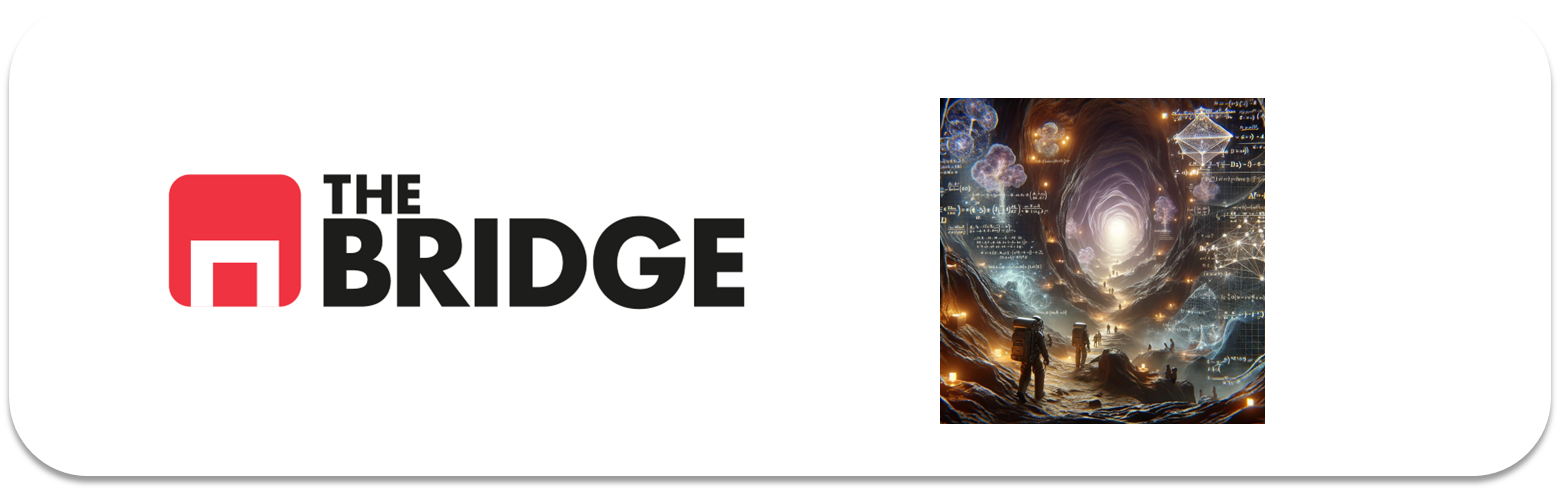

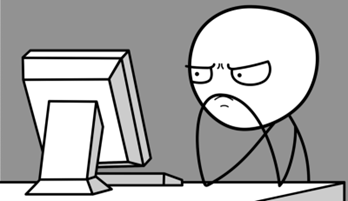

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [106]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [93]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin', "Nombre"]

In [94]:
df = pd.read_csv("./data/Autos_data.txt", sep=r"\s+", names=column_names)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Nombre
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [95]:
df.Horsepower.value_counts(ascending=True).sort_values()

Horsepower
94.00     1
138.0     1
135.0     1
142.0     1
77.00     1
         ..
100.0    17
110.0    18
88.00    19
90.00    20
150.0    22
Name: count, Length: 94, dtype: int64

In [96]:
df["Horsepower"] = pd.to_numeric(df["Horsepower"], errors='coerce')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Nombre        398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [98]:
df_limpio = df.dropna() # eliminamos las 6 lineas sin datos de Horsepower

In [99]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
 8   Nombre        392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [100]:
df_limpio.describe(include="all")

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Nombre
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


In [101]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df_limpio)

COL_N,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Nombre
DATA_TYPE,float64,int64,float64,float64,float64,float64,int64,int64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,127,5,81,93,346,95,13,3,301
CARDIN (%),32.4,1.28,20.66,23.72,88.27,24.23,3.32,0.77,76.79


| Variable        | Explicación                                                                               |
| --------------- | ----------------------------------------------------------------------------------------- |
| **MPG**         | Millas por galón, es una medida de eficiencia del combustible.                            |
| **Cylinders**   | Número de cilindros en el motor del vehículo.                                             |
| **Displacement**| Desplazamiento del motor en pulgadas cúbicas (cuánto volumen ocupa el pistón).            |
| **Horsepower**  | Caballos de fuerza, una medida de la potencia del motor.                                  |
| **Weight**      | Peso del vehículo en libras.                                                              |
| **Acceleration**| Tiempo en segundos que toma el vehículo para acelerar de 0 a 60 millas por hora.          |
| **Model Year**  | Año del modelo del vehículo.                                                              |
| **Origin**      | Origen del vehículo (1: USA, 2: Europe, 3: Japan).                                        |
| **Name**        | Nombre del vehículo.                                                                      |


In [102]:
target = "MPG"
features_num = ['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration']
features_cat = ['Model Year', 'Origin', 'Nombre']

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [103]:
def mapping(x):
    if x == 1:
        return "USA"
    elif x == 2:
        return "Europa"
    elif x == 3:
        return "Japón"
    else:
        return "Unknow"

df_limpio['Origin'] = df_limpio['Origin'].apply(mapping)
df_limpio

C:\Users\josel\AppData\Local\Temp\ipykernel_24516\526235007.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Origin'] = df_limpio['Origin'].apply(mapping)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Nombre
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europa,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger


In [104]:
from sklearn.preprocessing import OneHotEncoder

df_limpio_dum = pd.get_dummies(df_limpio, columns=['Origin'])
df_limpio_dum

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Nombre,Origin_Europa,Origin_Japón,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,ford mustang gl,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,vw pickup,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,dodge rampage,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,ford ranger,False,False,True


In [105]:
df_limpio_dum = df_limpio_dum.drop(columns=['Nombre'])
df_limpio_dum

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europa,Origin_Japón,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df_limpio_dum.drop(columns=[target]),
                                                    df_limpio_dum[target],
                                                    test_size=0.2,
                                                    random_state=42)

In [113]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 9)
(313,)
(79, 9)
(79,)


In [116]:
X_train

array([[ 0.30486156,  0.28457757,  0.14142863, ..., -0.42559614,
        -0.50199602,  0.74128601],
       [-0.87318372, -0.53588042, -0.32949862, ..., -0.42559614,
        -0.50199602,  0.74128601],
       [ 0.30486156, -0.23665456, -0.19868549, ..., -0.42559614,
        -0.50199602,  0.74128601],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, ..., -0.42559614,
        -0.50199602,  0.74128601],
       [-0.87318372, -0.94128319, -1.0358895 , ..., -0.42559614,
        -0.50199602,  0.74128601],
       [ 1.48290683,  1.97375578,  1.18793363, ..., -0.42559614,
        -0.50199602,  0.74128601]])

### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

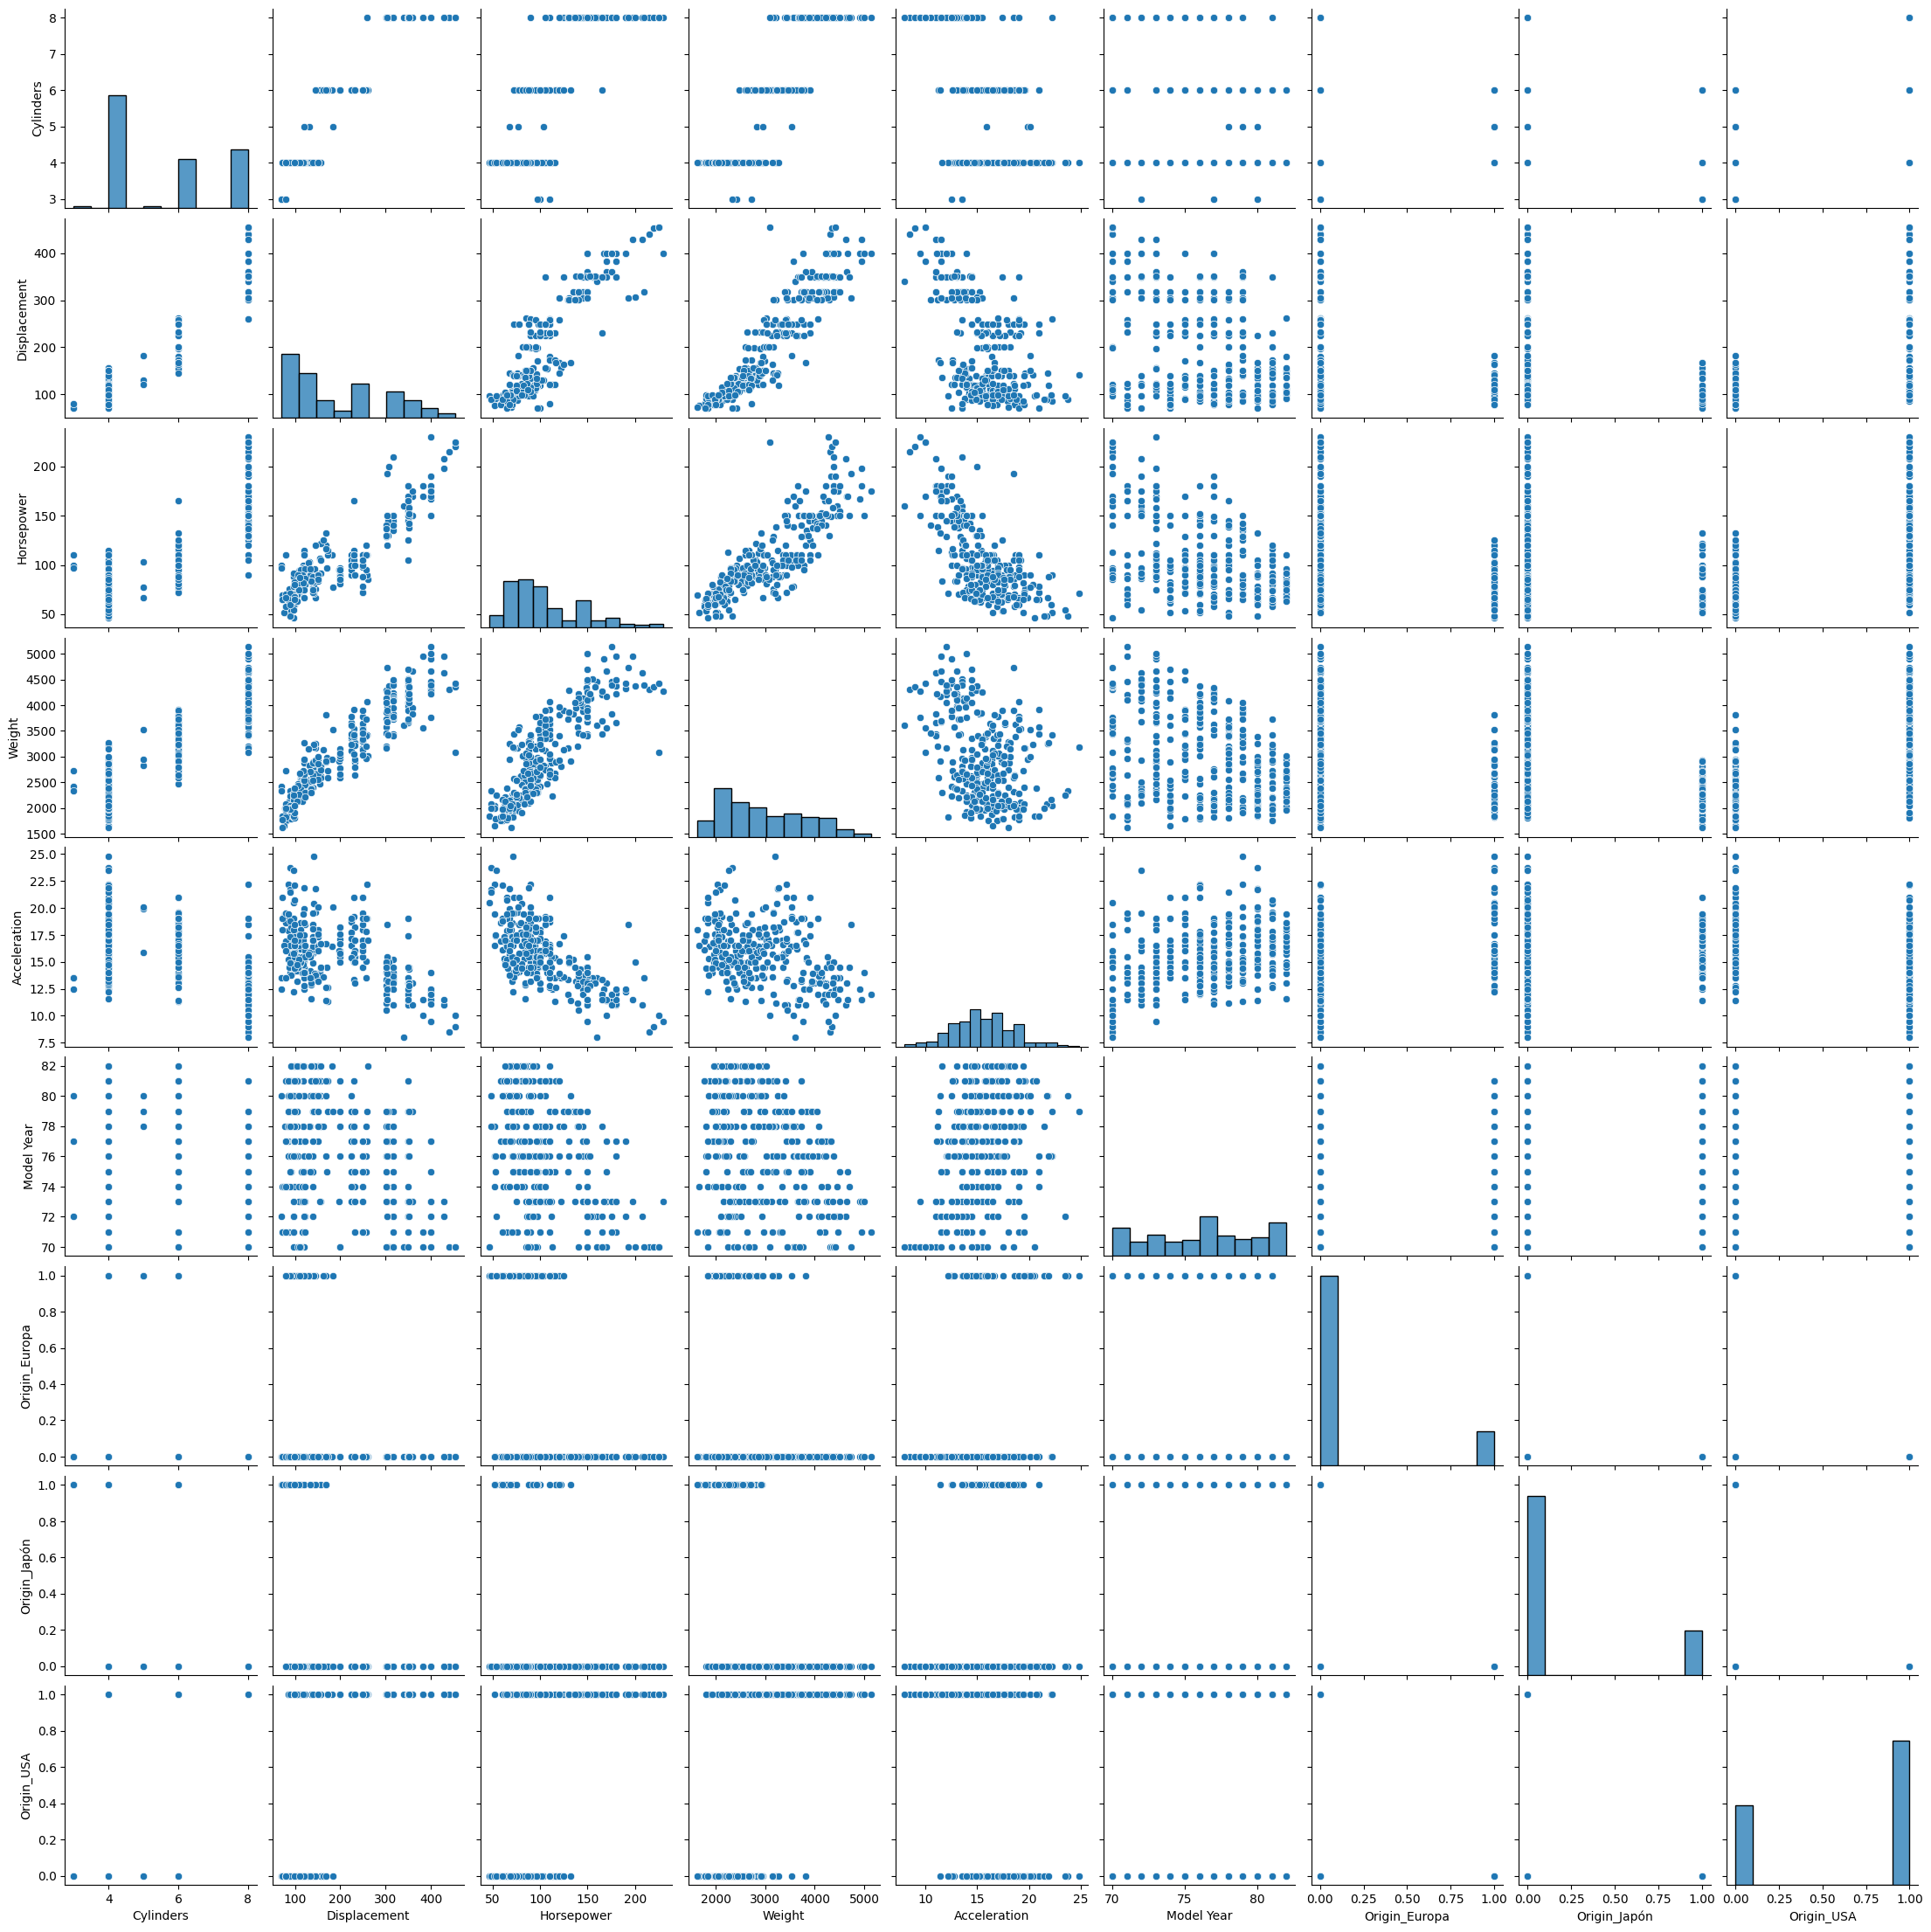

In [114]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame llamado 'df'
# Carga tus datos en el DataFrame
# df = pd.read_csv('tu_dataset.csv')

# Crea el grid de gráficos
grid = sns.pairplot(X_train)

# Muestra los gráficos
plt.show()


### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [115]:
from sklearn.preprocessing import StandardScaler

# Creo el scaler con los datos de train
scal = StandardScaler() # Declaro el scaler
scal.fit(X_train) # Lo "entreno". Calculo su media y std para cada feature
X_train = scal.transform(X_train) # Aplico el scaler y sobreescribo los datos de train

# Aplico el mismo scaler con los datos de test
X_test = scal.transform(X_test)

## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Define el modelo
model = Sequential()

# Añade la capa de entrada utilizando Input
model.add(Input(shape=(X_train.shape[1],)))

# Añade la capa densa (Dense layer)
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))

model.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=["mae", "mse"])

### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [120]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [121]:
history = model.fit(X_train, y_train,
                    epochs=1000,
                    validation_split= 0.2)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 572.8568 - mae: 22.6257 - mse: 572.8568 - val_loss: 626.9126 - val_mae: 23.7505 - val_mse: 626.9126
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 522.9663 - mae: 21.4755 - mse: 522.9663 - val_loss: 573.9612 - val_mae: 22.5518 - val_mse: 573.9612
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 488.3739 - mae: 20.4718 - mse: 488.3739 - val_loss: 521.7395 - val_mae: 21.3089 - val_mse: 521.7395
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 456.6587 - mae: 19.4435 - mse: 456.6587 - val_loss: 466.4811 - val_mae: 19.9300 - val_mse: 466.4811
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 376.0754 - mae: 17.3582 - mse: 376.0754 - val_loss: 407.4565 - val_mae: 18.3883 - val_mse: 407.4565
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 320.9565 - mae: 15.7319 - mse: 320.9565 - val_loss: 346.7093 - val_mae: 16.8370 - val_mse: 346.7093
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

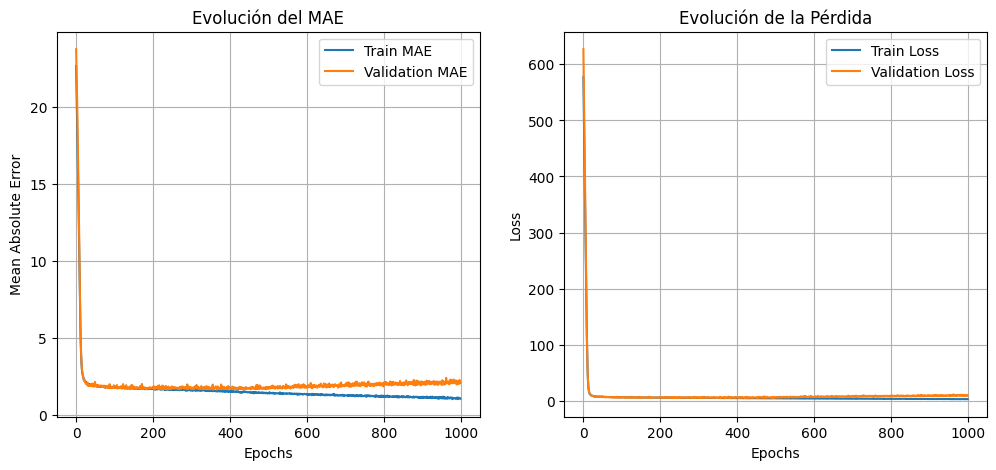

In [130]:
# Evolución del error (MAE)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Evolución del MAE')
plt.legend()
plt.grid(True)

# Evolución de la pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True)

plt.show()

### Ejercicio 11

Comenta las gráficas anteriores.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

In [136]:
# Define el modelo
model_2 = Sequential()

# Añade la capa de entrada utilizando Input
model_2.add(Input(shape=(X_train.shape[1],)))

# Añade la capa densa (Dense layer)
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(1))

model_2.compile(loss="mean_squared_error",
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=["mae", "mse"])

In [137]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, 
                                                  restore_best_weights=True)
history = model_2.fit(X_train, y_train, epochs=1000,
                    validation_split= 0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 625.9487 - mae: 23.5773 - mse: 625.9487 - val_loss: 637.1737 - val_mae: 23.8765 - val_mse: 637.1737
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 535.5743 - mae: 21.3698 - mse: 535.5743 - val_loss: 587.5299 - val_mae: 22.7795 - val_mse: 587.5299
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 487.5692 - mae: 20.4799 - mse: 487.5692 - val_loss: 535.2048 - val_mae: 21.5821 - val_mse: 535.2048
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 455.0938 - mae: 19.4615 - mse: 455.0938 - val_loss: 478.6138 - val_mae: 20.2194 - val_mse: 478.6138
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 404.4731 - mae: 18.2653 - mse: 404.4731 - val_loss: 417.4466 - val_mae: 18.6617 - val_mse: 417.4466
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 362.0632 - mae: 16.9706 - mse: 362.0632 - val_loss: 354.6557 - val_mae: 16.9865 - val_mse: 354.6557
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/

Interpreta el gráfico

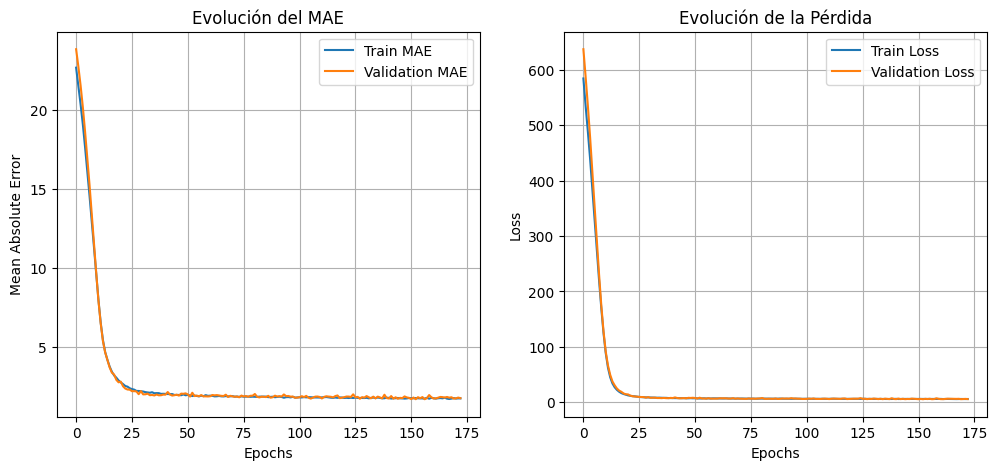

In [138]:
# Evolución del error (MAE)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Evolución del MAE')
plt.legend()
plt.grid(True)

# Evolución de la pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True)

plt.show()

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [139]:
loss_mae_mse_test = model_2.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0950 - mae: 1.8219 - mse: 6.0950 


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [141]:
y_test

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: MPG, Length: 79, dtype: float64

In [144]:
predictions =model_2.predict(X_test)
predictions.shape

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(79, 1)

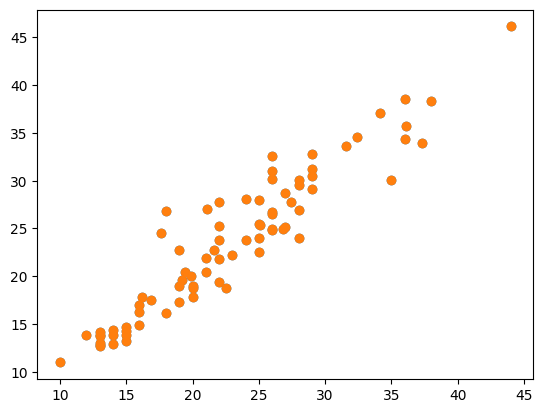

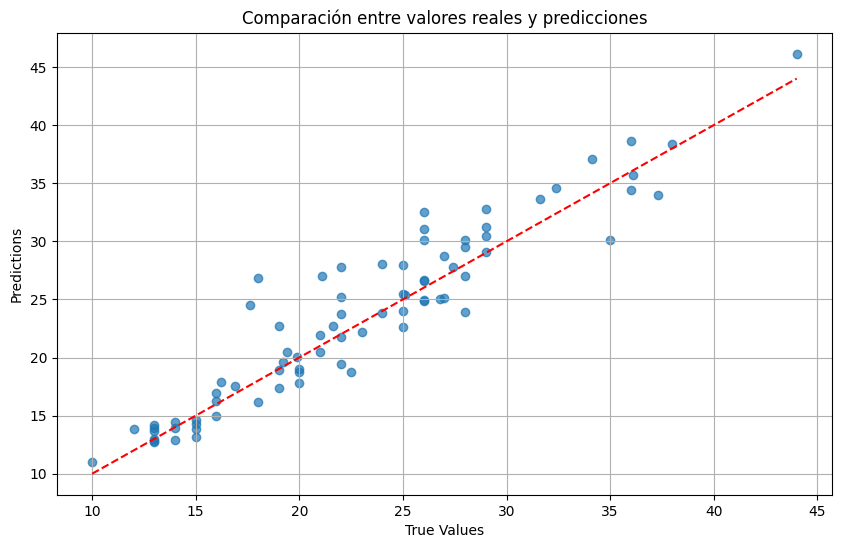

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Comparación entre valores reales y predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()